<a href="https://colab.research.google.com/github/xFlodz/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%9610%20%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20YOLOv12%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D0%B8%20%D0%B8%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №10. Использование модели YOLOv12 для решение задач детекции и классификации**

## **Задание 1. Знакомство с новейшей версией модели YOLO**

- Ознакомьтесь с технической документацией по новейшей версии модели YOLOv12: https://docs.ultralytics.com/ru/models/yolo12/

- Рассмотрите пример обучения этой модели c использованием датасетов, созданных в Roboflow: https://blog.roboflow.com/train-yolov12-model/

### **Ответьте на вопрос: Какие принципиальные отличия появились в модели YOLOv12 относительно предыдущих версий?**

**ВАШ ОТВЕТ**

*Примечание:* для каждого последующего задания, в конечном итоге, необходимо сформировать обученную модель и задеплоить её на сервисе **RoboFlow**



## **Задание 2. Найдите готовый датасет для детекции объектов и обучите на нем модель YOLOv12:**

- Для удобства работы с датасетом и деплоя модели используйте сервис [RoboFlow](https://roboflow.com/)

In [1]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [2]:
import os
HOME = os.getcwd()

In [3]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from roboflow import download_dataset

dataset = download_dataset('https://universe.roboflow.com/brad-dwyer/aquarium-combined/dataset/6', 'yolov8')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aquarium-Combined-6 in yolov8:: 100%|██████████| 1288/1288 [00:00<00:00, 1458.55it/s]


In [7]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=100)

New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Aquarium-Combined-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /content/Aquarium-Combined-6/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 2382.52it/s]


train: New cache created: /content/Aquarium-Combined-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Aquarium-Combined-6/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 818.69it/s]

val: New cache created: /content/Aquarium-Combined-6/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.99G      4.193      4.865      4.228        196        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        127        909   0.000227      0.022   0.000141   3.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.02G      4.033      4.785      4.111        195        640: 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        127        909   0.000372     0.0258   0.000202   7.25e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.16G      3.798      4.536      3.911        198        640: 100%|██████████| 28/28 [00:18<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        127        909   0.000298     0.0246   0.000169   4.97e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.05G      3.582      4.439      3.688        126        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909   0.000383      0.034   0.000291   7.19e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.03G      3.436      4.044      3.412        209        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        127        909    0.00291      0.137    0.00464    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         7G      3.313      3.884       3.23        185        640: 100%|██████████| 28/28 [00:18<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        127        909      0.581     0.0171    0.00752    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         7G      3.188      3.845      3.082        200        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        127        909       0.65     0.0358     0.0168    0.00432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.99G      3.176      3.643      2.956        341        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.317      0.083     0.0141    0.00497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.18G      3.061      3.604      2.905        173        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        127        909      0.316     0.0635     0.0176    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.21G      2.975      3.471      2.798        271        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.639     0.0773     0.0403      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.19G      2.961      3.553      2.768        193        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        127        909      0.337     0.0492     0.0266    0.00796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.19G        2.9       3.34       2.67        186        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        127        909      0.223     0.0847     0.0589     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.15G      2.825      3.303      2.633        111        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        127        909      0.245      0.126     0.0723     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.14G      2.844      3.291       2.62        137        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        127        909      0.386      0.126     0.0715      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.15G      2.763      3.187      2.569        163        640: 100%|██████████| 28/28 [00:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        127        909      0.147      0.133     0.0861     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.17G      2.743      3.047      2.487        236        640: 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.292      0.139     0.0821     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.17G      2.691      3.051       2.47        159        640: 100%|██████████| 28/28 [00:18<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.339      0.149     0.0977     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.15G      2.624      2.973      2.447        160        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        127        909      0.129      0.148     0.0898     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.16G      2.606      2.967      2.407        199        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        127        909      0.309      0.189      0.118     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.19G      2.664       2.99       2.41        223        640: 100%|██████████| 28/28 [00:18<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        127        909      0.171      0.168      0.107     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.26G      2.531      2.822      2.317        180        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        127        909      0.158      0.196      0.122     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       7.2G      2.499      2.849      2.313        178        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        127        909      0.259      0.189      0.147     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.16G      2.515      2.797      2.292        132        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        127        909      0.205      0.225      0.146     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.21G      2.493      2.763      2.266        241        640: 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        127        909      0.196      0.194      0.146     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.16G      2.442      2.638      2.207        153        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        127        909      0.222       0.19      0.156     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.17G       2.44      2.663      2.225        224        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        127        909      0.278      0.189      0.185     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.16G      2.432      2.693      2.219        255        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        127        909      0.411       0.21      0.187     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.25G      2.377      2.638       2.21        198        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        127        909      0.281      0.195      0.202     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.15G      2.381      2.561      2.143        228        640: 100%|██████████| 28/28 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        127        909      0.295      0.229      0.198     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.16G      2.342      2.575      2.163        170        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        127        909      0.375      0.241      0.221     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.15G      2.333      2.503      2.134        137        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.296      0.273      0.229     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       7.2G      2.304      2.501      2.149        174        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        127        909      0.264      0.255      0.211     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       7.2G      2.289       2.47      2.122        237        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        127        909      0.365      0.277      0.231     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.15G      2.245      2.365      2.081        297        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        127        909      0.316      0.268       0.23      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       7.2G      2.266      2.429      2.069        185        640: 100%|██████████| 28/28 [00:18<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        127        909      0.286      0.272      0.261     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.17G      2.284      2.411       2.07        194        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.301      0.314      0.277      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.19G       2.23      2.335      2.056        230        640: 100%|██████████| 28/28 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.328      0.284      0.254     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.15G      2.242      2.349      2.053        284        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        127        909       0.37       0.29      0.279      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       7.2G      2.201      2.303          2        267        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        127        909      0.352      0.307      0.275      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.21G      2.189      2.195      1.945        184        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        127        909      0.368      0.308      0.295      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.01G      2.146      2.265      1.994        116        640: 100%|██████████| 28/28 [00:16<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        127        909      0.423      0.327      0.305      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.26G      2.157      2.234      1.984        262        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        127        909      0.383       0.38      0.329      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.17G      2.134      2.235       1.99        142        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        127        909      0.407      0.332      0.308      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.16G      2.176      2.204      1.954        165        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        127        909      0.341      0.337      0.297      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.17G      2.148      2.187      1.939        200        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        127        909      0.397       0.38      0.339      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.19G        2.1      2.137      1.908        205        640: 100%|██████████| 28/28 [00:18<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        127        909      0.425      0.334      0.337      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.15G      2.111      2.191      1.953        179        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        127        909      0.352       0.36      0.319      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.18G      2.072      2.098      1.915        176        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        127        909       0.49      0.349      0.367      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.17G      2.087       2.14      1.886        248        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        127        909      0.428      0.333      0.334      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       7.2G      2.079      2.088      1.899        238        640: 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        127        909      0.413       0.35      0.335       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.18G      2.087      2.158      1.902        234        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        127        909      0.418      0.354      0.359      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.2G      2.064      2.028      1.841        216        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.467      0.398      0.385      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.13G      2.067       2.02      1.851        176        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        127        909      0.489      0.335      0.363      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.15G      1.999      1.974      1.824        190        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        127        909      0.435      0.421      0.394      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.23G          2      1.944      1.844        120        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        127        909      0.506      0.352      0.402      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.15G      2.018      1.983      1.849        144        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.459      0.392      0.406      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.14G      2.013      1.997       1.82        241        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.478       0.39      0.416      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.19G      1.981      1.973      1.837        223        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        127        909       0.48      0.416      0.429      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.22G      2.001      1.944      1.823        184        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.495      0.382      0.426      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.16G      2.011        1.9      1.811        178        640: 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        127        909      0.523      0.428      0.445      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.15G      1.995      1.915      1.777        204        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        127        909      0.535      0.411      0.435      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.18G      1.983      1.877      1.786        193        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        127        909      0.521      0.408      0.443      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.17G      1.973      1.899      1.777        188        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        127        909      0.568      0.391      0.454      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.27G      1.982      1.853      1.759        183        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        127        909      0.536      0.444       0.45      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.16G      1.958      1.834      1.769        196        640: 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        127        909      0.579      0.363      0.431      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.14G      1.968      1.867      1.755        200        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        127        909      0.504      0.427      0.453      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.17G      1.971      1.873      1.778        210        640: 100%|██████████| 28/28 [00:18<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        127        909      0.504       0.45      0.457      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.15G      1.969      1.883      1.773         78        640: 100%|██████████| 28/28 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        127        909       0.56      0.421       0.46      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.16G      1.938      1.833      1.772        213        640: 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        127        909      0.506      0.448      0.462      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.21G      1.958      1.776      1.761        220        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        127        909      0.543      0.402      0.439      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         7G      1.884      1.754       1.73        207        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        127        909      0.614      0.403      0.479      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.01G      1.889      1.746      1.704        230        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        127        909      0.567      0.436       0.47      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.05G      1.868       1.74       1.73        131        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        127        909      0.588      0.434      0.479      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.05G      1.902      1.744      1.697        179        640: 100%|██████████| 28/28 [00:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        127        909       0.55      0.455      0.468      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.04G      1.902      1.757      1.724        133        640: 100%|██████████| 28/28 [00:18<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        909      0.606      0.423      0.471      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         7G      1.862      1.716      1.704        170        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        127        909      0.531      0.439      0.485       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.02G      1.892      1.751      1.722        174        640: 100%|██████████| 28/28 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        127        909       0.54      0.459      0.485      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.16G      1.889      1.736      1.679        193        640: 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        127        909      0.523      0.445       0.48      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.16G      1.911      1.806      1.728        201        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        127        909       0.54      0.469      0.498      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.18G      1.879      1.731       1.69        199        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        127        909      0.553      0.456      0.491       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.14G      1.855      1.696      1.681        210        640: 100%|██████████| 28/28 [00:18<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.598      0.465      0.506      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.17G      1.836      1.648      1.669        204        640: 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        127        909      0.536      0.456      0.494      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.25G      1.879      1.715      1.702        121        640: 100%|██████████| 28/28 [00:18<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        127        909      0.572      0.456      0.505      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.16G      1.828      1.646      1.628        211        640: 100%|██████████| 28/28 [00:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        127        909       0.55      0.483      0.518      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.16G      1.834      1.689      1.692        166        640: 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        127        909      0.643      0.426      0.516      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.17G      1.813      1.662      1.682        171        640: 100%|██████████| 28/28 [00:18<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        127        909      0.556       0.48      0.518      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.19G       1.82       1.65      1.628        273        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        127        909      0.577      0.479      0.519      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.15G      1.802      1.583      1.621        241        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        127        909      0.642      0.428      0.516       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.18G       1.81      1.619      1.662        236        640: 100%|██████████| 28/28 [00:18<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        909      0.638       0.46      0.522       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.21G      1.839      1.656       1.67        210        640: 100%|██████████| 28/28 [00:18<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.594      0.469      0.515      0.244


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.15G      1.768      1.742      1.677         81        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        127        909      0.676      0.458      0.537      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.19G      1.756      1.667       1.66        133        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        127        909      0.587      0.452      0.518      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.17G      1.737      1.633      1.656        121        640: 100%|██████████| 28/28 [00:18<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        909      0.639      0.447      0.528      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       7.2G       1.73      1.584       1.62         92        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        127        909      0.587      0.507      0.538      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       7.2G      1.761      1.619      1.674        165        640: 100%|██████████| 28/28 [00:17<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        127        909      0.602      0.488      0.538      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.15G      1.749      1.575      1.623         93        640: 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        127        909      0.626      0.487      0.547      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.16G      1.736      1.579      1.645        134        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        127        909      0.612      0.477      0.544      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.17G      1.734      1.571       1.63        121        640: 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        127        909      0.602      0.487      0.543      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.19G      1.713      1.557      1.604        109        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        127        909      0.626      0.468      0.538      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.14G      1.697      1.558      1.636        122        640: 100%|██████████| 28/28 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        127        909      0.615       0.49      0.542      0.257



100 epochs completed in 0.620 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,076,917 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        127        909      0.603      0.487      0.542      0.257
                  fish         63        459      0.762      0.501       0.62      0.291
             jellyfish          9        155      0.577      0.774      0.745      0.346
               penguin         17        104      0.529      0.442      0.499      0.181
                puffin         15         74      0.485      0.324       0.33      0.139
                 shark         28         57       0.58      0.404      0.489       0.21
              starfish         17         27      0.548      0.444      0.468      0.299
              stingray         23         33      0.739      0.516      0.641      0.334
Speed: 0.4ms preprocess, 10.3ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train2


In [32]:
import supervision as sv

model = YOLO(f'/content/runs/detect/train2/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

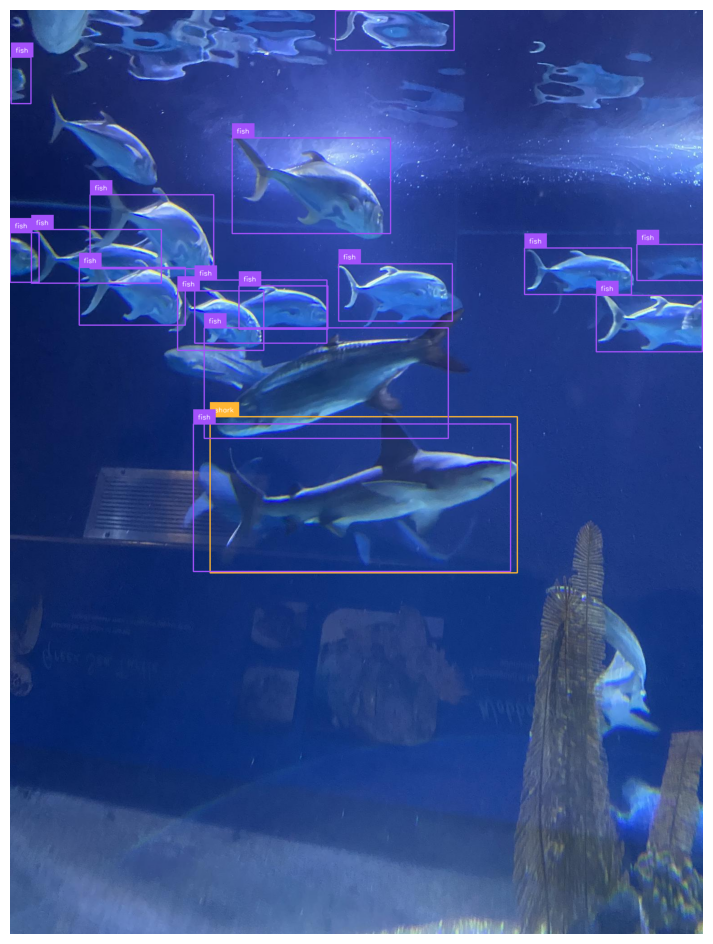

In [37]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## **Задание 3. Сформируйте свой датасет для детекции объектов и обучите на нем модель YOLOv12**



Требования к датасету:

- Количество изображений в датасете: минимум 90
- Количество классов: более 2х
- Обязательно должны присутствовать изображения, содержащие несколько классов одновременно


*Примечание: Формирование датасета включает в себя поиск изображений и ручное аннотирование объектов на изображениях.*

In [106]:
dataset = download_dataset('https://universe.roboflow.com/xflod/catanddogs-6uwnp/dataset/5', 'yolov12')

loading Roboflow workspace...
loading Roboflow project...


In [108]:
model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=250)

New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/CatAndDogs-5/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /content/CatAndDogs-5/train/labels.cache... 167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 167/167 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/CatAndDogs-5/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250         7G      3.109      3.655      4.246         23        640: 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         19         20    0.00474      0.955     0.0101    0.00528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      7.07G      3.089      3.654      4.215         28        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         19         20    0.00391      0.955     0.0115    0.00591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      7.09G      3.117      3.629      4.192         22        640: 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         19         20    0.00448      0.955     0.0105     0.0047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      7.07G      3.106      3.631      4.154         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         19         20    0.00444      0.955     0.0175    0.00902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      7.09G      3.086      3.543      4.098         20        640: 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         19         20    0.00452      0.955     0.0773     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250       7.1G      3.101      3.527      4.061         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         19         20     0.0023      0.606     0.0192     0.0054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      7.08G      2.964      3.546       3.96         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         19         20    0.00308      0.697     0.0371    0.00939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      7.09G      2.937      3.523      3.836         11        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         19         20    0.00366      0.955     0.0478     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      7.08G      2.861      3.453       3.76         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         19         20      0.514      0.278     0.0494     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      7.14G      2.788      3.425      3.646         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20    0.00754          1      0.103     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      7.08G      2.822      3.391      3.558         38        640: 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         19         20    0.00754          1      0.103     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      7.08G      2.695      3.379      3.453         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20      0.015      0.742     0.0366     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      7.08G      2.683      3.318      3.367         23        640: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         19         20    0.00295       0.54     0.0482     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      7.12G       2.68      3.318      3.361         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         19         20    0.00282      0.485      0.041    0.00949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      7.08G      2.651      3.295      3.316         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         19         20    0.00352      0.687     0.0387     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      7.11G      2.626      3.205      3.264         28        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         19         20    0.00294      0.808     0.0986     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      7.08G      2.566      3.182      3.266         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         19         20    0.00283      0.808     0.0299    0.00827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      7.09G      2.526      3.192      3.194         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         19         20     0.0125      0.707      0.036     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.92G      2.451      3.152      3.106         16        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         19         20    0.00176      0.505     0.0103    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      7.14G       2.44      3.151      3.121         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20     0.0295      0.222     0.0647     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      7.11G      2.494      3.121       3.11         14        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19         20     0.0298      0.222     0.0317    0.00828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.14G      2.476      3.124       3.09         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20    0.00267      0.763     0.0878      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.93G      2.377      3.104      3.051         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         19         20     0.0207      0.854      0.175     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      7.09G      2.349      3.026      2.966         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         19         20     0.0522      0.396      0.125     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      7.08G      2.401      2.996      2.997         19        640: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         19         20      0.544      0.444      0.144     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      7.09G      2.373      3.048      2.955         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         19         20     0.0594      0.535      0.126     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      7.08G      2.285      2.951      2.926         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         19         20     0.0272      0.389      0.181     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      7.09G       2.31      2.966      2.955         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         19         20      0.544      0.444      0.196     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      7.11G      2.326      3.007      2.946         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         19         20      0.538        0.5      0.281     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      7.09G      2.241      2.919      2.894         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.556      0.222      0.176     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      7.08G      2.284      2.946      2.866         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         19         20      0.579      0.278      0.171     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      7.08G      2.227      2.889      2.809         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20     0.0991      0.808      0.254      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      7.08G      2.224      2.924      2.795         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         19         20     0.0824      0.955      0.286     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      7.09G      2.163      2.909       2.85         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         19         20     0.0618      0.424     0.0551     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250       7.1G      2.209      2.856      2.813         32        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         19         20      0.175       0.47      0.115     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      7.15G      2.194      2.849      2.814         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         19         20     0.0745      0.495       0.14     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      7.08G      2.203      2.882      2.835         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         19         20     0.0662      0.687      0.161       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      7.11G      2.182      2.872      2.788         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         19         20      0.163      0.955      0.399      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      7.08G       2.13      2.892      2.789         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         19         20      0.187      0.521      0.283     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      7.12G      2.238      2.886      2.796         32        640: 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.162       0.48      0.272        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250       7.1G      2.134      2.786      2.779         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.128      0.753      0.247     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      7.14G       2.14      2.817      2.752         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         19         20      0.124      0.854      0.319      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      7.08G      2.155      2.795      2.759         28        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.521      0.535      0.483      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      7.08G      2.191      2.796      2.724         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         19         20      0.173      0.717      0.374      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      7.11G      2.156      2.784       2.78         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         19         20      0.171      0.854      0.319      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      7.09G      2.114      2.752      2.727         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         19         20      0.139      0.652      0.302      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.91G      2.111       2.63      2.657         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         19         20      0.551      0.389      0.335      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      7.12G      2.095      2.654      2.683         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20        0.3      0.434      0.305      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      7.08G      2.096      2.747      2.661         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         19         20      0.253       0.48      0.329       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      7.11G      2.055       2.65      2.668         29        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20       0.26      0.798      0.406      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250       7.1G      2.065       2.63      2.638         29        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20      0.157      0.781      0.435      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.98G      2.139      2.717      2.742         45        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         19         20      0.189      0.617      0.336      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      7.08G      2.034      2.627      2.621         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         19         20      0.212      0.717      0.246     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      7.09G       1.99      2.572      2.603         38        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         19         20      0.233      0.763      0.304      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      7.08G      2.018      2.566      2.572         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20      0.251      0.616      0.302       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      7.13G      1.959       2.52      2.577         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.323      0.383      0.277      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      7.08G      1.967      2.467      2.532         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.303      0.359      0.249     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      7.09G      1.971      2.523      2.533         16        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.248      0.763      0.364      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      7.08G      1.991      2.477      2.549         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         19         20       0.24      0.818      0.386      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      7.08G      1.948      2.505      2.524         31        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19         20      0.289      0.798      0.457      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      7.08G      1.936      2.541      2.551         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         19         20      0.254      0.798      0.402      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      7.09G      1.888      2.483      2.486         32        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.256      0.687      0.419      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      7.08G       1.94      2.527      2.537         27        640: 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20      0.213      0.697       0.44      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      7.09G      1.909      2.423      2.507         16        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.244      0.773      0.366      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      7.08G      1.923      2.482       2.51         37        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         19         20      0.304      0.689      0.375      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      7.11G       1.88       2.46      2.482         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.272      0.763      0.425      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      7.08G      1.913      2.456       2.47         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         19         20      0.295      0.606      0.424      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250       7.1G      1.882      2.441      2.471         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         19         20      0.237      0.707      0.286       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      7.08G      1.846      2.415      2.463         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20       0.28      0.864      0.345      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      7.09G      1.896      2.387      2.461         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         19         20      0.237      0.672      0.283      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      7.08G      1.854       2.34      2.396         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.246      0.808      0.305      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      7.11G      1.826       2.32      2.443         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.214      0.808      0.352      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      7.08G      1.929      2.461      2.475         14        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19         20      0.242      0.808      0.421      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      7.09G      1.813      2.323      2.386         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.342      0.753      0.369      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250       7.1G      1.792      2.306      2.326         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         19         20      0.414      0.652      0.413      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      7.13G      1.763      2.248      2.316         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.433      0.612       0.47      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      7.08G      1.778      2.199      2.321         21        640: 100%|██████████| 11/11 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19         20      0.267      0.707       0.39      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      7.12G      1.846       2.35      2.381         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         19         20      0.294      0.637      0.407      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      7.08G      1.817      2.281      2.353         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         19         20      0.347      0.717      0.433      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      7.08G      1.833      2.304      2.399         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20      0.326       0.83      0.402      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      7.11G      1.792      2.253      2.319         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20       0.32      0.707      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      7.09G       1.76      2.246      2.324         38        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         19         20      0.331      0.561      0.396      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      7.13G      1.766      2.321      2.313         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         19         20      0.389      0.703      0.484       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      7.11G      1.709      2.239      2.316         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         19         20      0.378      0.763      0.459      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      7.11G      1.786      2.236      2.338         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.343      0.583      0.452      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      7.09G       1.83      2.266      2.336         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.273      0.424      0.413      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      7.08G        1.8      2.303      2.345         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.216       0.48      0.356      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250       7.1G      1.735      2.225      2.253         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19         20       0.37      0.669      0.454      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      7.08G      1.694      2.177       2.26         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.396      0.662      0.523      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      7.09G      1.707      2.163      2.254         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         19         20      0.246      0.818      0.489      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      7.08G      1.735      2.221      2.306         12        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         19         20      0.216      0.753      0.485      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      7.09G      1.768      2.227      2.328         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.205      0.798       0.43      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      7.08G      1.735       2.19      2.276         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         19         20      0.331      0.753      0.447      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      7.09G      1.709      2.148      2.288         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.271      0.717      0.402      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      7.08G       1.64       2.12       2.18         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.337      0.707      0.425      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      7.11G      1.677      2.119      2.202         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         19         20      0.333      0.578      0.363      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      7.13G      1.687      2.197      2.285         29        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20      0.361      0.662      0.472      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      7.09G      1.714      2.206      2.284         32        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         19         20       0.33      0.707      0.409      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.91G      1.656      2.116      2.196         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         19         20      0.407      0.598      0.333      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      7.09G       1.66       2.16      2.217         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20       0.44      0.662      0.491      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      7.08G      1.618      2.149      2.202         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         19         20      0.324      0.596      0.466       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      7.09G       1.65      2.084      2.181         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         19         20      0.281      0.687      0.416       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      7.08G       1.71      2.161      2.262         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.337      0.641      0.505      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      7.14G      1.614      2.103      2.202         18        640: 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.341      0.589      0.487      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      7.08G      1.691      2.177      2.231         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         19         20      0.367      0.606      0.502      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      7.09G       1.68      2.174      2.206         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20      0.305       0.54      0.405       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      7.08G       1.65      2.086       2.19         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         19         20      0.458      0.717      0.602      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      7.11G      1.623      2.019      2.173         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.553      0.655      0.579      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      7.08G      1.618       2.06      2.179         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.417      0.596      0.526      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      7.09G      1.603      2.124      2.188         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         19         20      0.339      0.808      0.524       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.91G      1.704      2.146      2.243         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         19         20      0.309      0.818      0.423      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      7.09G      1.681      2.167      2.208         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         19         20      0.461      0.543      0.536      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250       7.1G      1.631      2.106        2.2         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19         20      0.426       0.47      0.459      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      7.12G       1.67       2.09      2.167         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         19         20      0.395      0.608      0.558      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      7.08G      1.622      2.117      2.155         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20      0.327      0.662      0.398      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      7.13G      1.613      2.078      2.172         38        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         19         20      0.324      0.505      0.277      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      7.08G       1.61      2.032      2.138         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         19         20      0.419      0.645      0.523      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      7.09G      1.544      1.993      2.088         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.287      0.606      0.425      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      7.13G      1.603      2.092      2.139         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         19         20      0.315      0.506      0.334       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      7.11G      1.595      2.094       2.16         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.258      0.687      0.466      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      7.08G      1.647      2.087      2.203         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         19         20      0.318      0.596       0.37      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      7.09G      1.633       2.05      2.161         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.337      0.652       0.35      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      7.08G       1.62      2.106      2.171         36        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.447      0.697      0.509      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250       7.1G      1.567      2.007      2.104         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         19         20      0.409       0.54      0.508      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      7.13G      1.602      2.065      2.144         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20      0.358      0.662      0.481      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      7.09G      1.653      2.132      2.188         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.401      0.704      0.485      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250       7.1G      1.559      1.972      2.132         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20      0.307      0.662      0.437      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250       7.1G      1.534      1.945      2.077         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         19         20      0.393      0.622      0.446      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      7.08G      1.528      1.979      2.095         34        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         19         20      0.363      0.612      0.394      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      7.09G      1.543      1.996      2.098         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.403      0.505      0.424      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.91G      1.558      1.966      2.118         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19         20      0.321       0.47      0.404      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      7.08G      1.599      2.003      2.141         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.419      0.654      0.569      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      7.08G      1.574      2.026      2.136         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.251      0.687      0.533      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      7.09G      1.533      1.997      2.106         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         19         20      0.294      0.589      0.383      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      7.08G       1.55      1.965      2.088         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         19         20      0.383      0.505      0.452      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250       7.1G      1.498      1.961      2.076         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.518      0.635      0.492      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      7.08G      1.583      2.028      2.119         14        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19         20      0.212      0.672      0.374       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      7.09G      1.563      1.982       2.13         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         19         20      0.308      0.596      0.368      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      7.08G      1.642      2.018      2.176         20        640: 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         19         20      0.419      0.634      0.467      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      7.11G      1.531      1.901       2.06         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20      0.365      0.553      0.465      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      7.08G      1.443      1.857       2.01         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.362      0.684       0.52      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      7.11G      1.579       1.93      2.066         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19         20      0.324      0.763      0.459      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      7.08G      1.611      2.105      2.181         38        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         19         20      0.308      0.795      0.461      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      7.13G      1.544      1.991      2.125         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.348       0.54      0.449      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      7.08G      1.555      1.968      2.092         37        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.264      0.652      0.377      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      7.09G      1.524      1.918      2.073         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         19         20      0.219      0.687       0.31      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      7.08G      1.567      1.924      2.109         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.286      0.585      0.436      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      7.16G      1.513      1.985      2.096         11        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20      0.304      0.584      0.406      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250       7.1G      1.562      1.947      2.156         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         19         20      0.353      0.606      0.363      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.92G      1.645      1.952       2.14         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         19         20      0.377      0.632      0.464      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.91G      1.558      1.922      2.116         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20       0.39      0.662      0.475      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      7.09G      1.456      1.877      2.045         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.196      0.707      0.297      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      7.08G      1.524      1.891      2.037         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.149      0.515      0.245      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      7.09G      1.415      1.839      1.981         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         19         20      0.192      0.561      0.256      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      7.08G      1.495      1.944       2.06         12        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.269      0.561      0.412      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      7.13G       1.52      1.944      2.064         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         19         20      0.369      0.717      0.463      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      7.08G       1.58       1.97       2.13         29        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20      0.286      0.515       0.34      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      7.09G      1.533      1.965      2.096         30        640: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         19         20      0.299       0.67      0.336      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      7.08G      1.471      1.882      2.019         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.263       0.69      0.385      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      7.11G      1.481      1.876      2.055         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19         20      0.278      0.682      0.407      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      7.08G      1.529      1.902      2.084         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         19         20      0.236      0.674      0.346       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      7.12G      1.492      1.973      2.038         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         19         20      0.241      0.626      0.354      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.94G      1.523      1.885      2.044         16        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         19         20      0.241      0.672      0.357      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.98G      1.518      1.915       2.04         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20       0.42      0.414      0.464      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      7.11G      1.447      1.885      2.032         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.485      0.394      0.455      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      7.09G      1.515      1.983      2.072         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.312      0.864      0.377      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250       7.1G      1.449      1.874      2.011         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.315      0.617      0.425      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      7.09G      1.481      1.859      2.029         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19         20      0.264      0.586      0.399      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      7.08G      1.487      1.869      2.037         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.346      0.485      0.445      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      7.11G      1.462       1.84      2.002         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         19         20      0.364      0.551      0.405      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      7.08G      1.526      1.908      2.056         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         19         20      0.474      0.556      0.545      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250       7.1G      1.481      1.909      2.039         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20      0.529      0.374      0.397      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250       7.1G      1.452      1.897      2.009         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         19         20      0.263       0.54      0.306      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.95G      1.457      1.864       2.05         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.261      0.561      0.292      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250       7.1G       1.46      1.898       2.03         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.271      0.737      0.395      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250       7.1G      1.415      1.794      1.972         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         19         20      0.329      0.561      0.383       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      7.08G      1.423      1.828      1.969         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         19         20      0.268      0.753      0.364      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      7.09G      1.483      1.866      2.021         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.292      0.697      0.396       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      7.08G      1.372      1.765       1.95         16        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.324      0.651      0.454       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      7.11G      1.402       1.79      1.962         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         19         20      0.297      0.612       0.45      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250       7.1G      1.471      1.856      2.038         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.358      0.601      0.479      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      7.09G      1.456      1.785       1.99         28        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         19         20      0.308      0.626      0.365      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      7.08G      1.493      1.906      2.031         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20        0.2      0.581      0.421      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250       7.1G      1.434      1.878      2.005         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         19         20      0.331      0.369      0.409      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      7.08G      1.432      1.861       1.99         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.537      0.418      0.538      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      7.12G       1.54      1.918      2.073         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         19         20      0.474       0.49      0.478      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.91G      1.414        1.8      1.938         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.347      0.597       0.49      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      7.11G      1.429      1.717      1.964         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19         20      0.347      0.652      0.451       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      7.08G      1.359       1.74       1.95         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         19         20      0.309      0.707      0.492      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.93G      1.469      1.801      2.018         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         19         20      0.442      0.748      0.535      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250       7.1G      1.457      1.822      2.032         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         19         20      0.368      0.763       0.48      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250       7.1G       1.43       1.76      1.973         19        640: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         19         20      0.516      0.394      0.529      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      7.08G      1.491       1.84      1.998         24        640: 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         19         20      0.312      0.616      0.523      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      7.09G      1.412      1.779      1.965         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.264      0.662      0.494      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.94G      1.389      1.746      1.918         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         19         20      0.677      0.303      0.478      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      7.13G      1.362      1.683      1.919         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         19         20      0.373      0.571      0.464      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      7.08G       1.38      1.769      1.954         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         19         20      0.339      0.663      0.471      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      7.12G      1.427      1.831      1.956         31        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         19         20      0.616      0.348      0.454      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      7.08G      1.379      1.689      1.933         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         19         20      0.681      0.336      0.431      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      7.11G      1.363      1.751      1.933         18        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         19         20      0.236      0.763      0.391      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      7.08G      1.351      1.702      1.891         21        640: 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.637      0.258      0.413      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      7.09G      1.332      1.674      1.914         20        640: 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20      0.296      0.498      0.447      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      7.08G      1.359      1.725       1.91         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         19         20      0.293      0.707      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      7.08G      1.391      1.693      1.937         30        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         19         20      0.262      0.753      0.421      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      7.08G      1.428      1.756      1.942         24        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         19         20      0.291      0.753      0.425      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      7.09G      1.363       1.66      1.929         20        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         19         20      0.282      0.652      0.434      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      7.08G      1.364      1.729      1.952         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         19         20      0.346      0.717      0.433      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      7.09G      1.384      1.693      1.898         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         19         20      0.321      0.727      0.463      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250       7.1G       1.36      1.573      1.914         22        640: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         19         20      0.331      0.697      0.496      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      7.09G      1.309       1.68      1.885         17        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19         20       0.34      0.571      0.473      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      7.08G      1.383      1.664       1.89         20        640: 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         19         20      0.845      0.298       0.54      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      7.11G      1.347      1.697        1.9         15        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         19         20      0.309      0.616      0.462      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      7.08G      1.335      1.623      1.887         25        640: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         19         20      0.255      0.717      0.434      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      7.09G        1.3      1.592      1.857         23        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         19         20      0.654      0.303       0.49      0.253
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 114, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



214 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 18.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 18.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


                   all         19         20       0.39      0.606      0.558      0.304
                   cat         11         11      0.381      0.545      0.522        0.3
                   dog          9          9      0.398      0.667      0.594      0.309
Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train10


In [109]:
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/train/images",
    annotations_directory_path=f"{dataset.location}/train/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

In [148]:
from IPython.display import Image

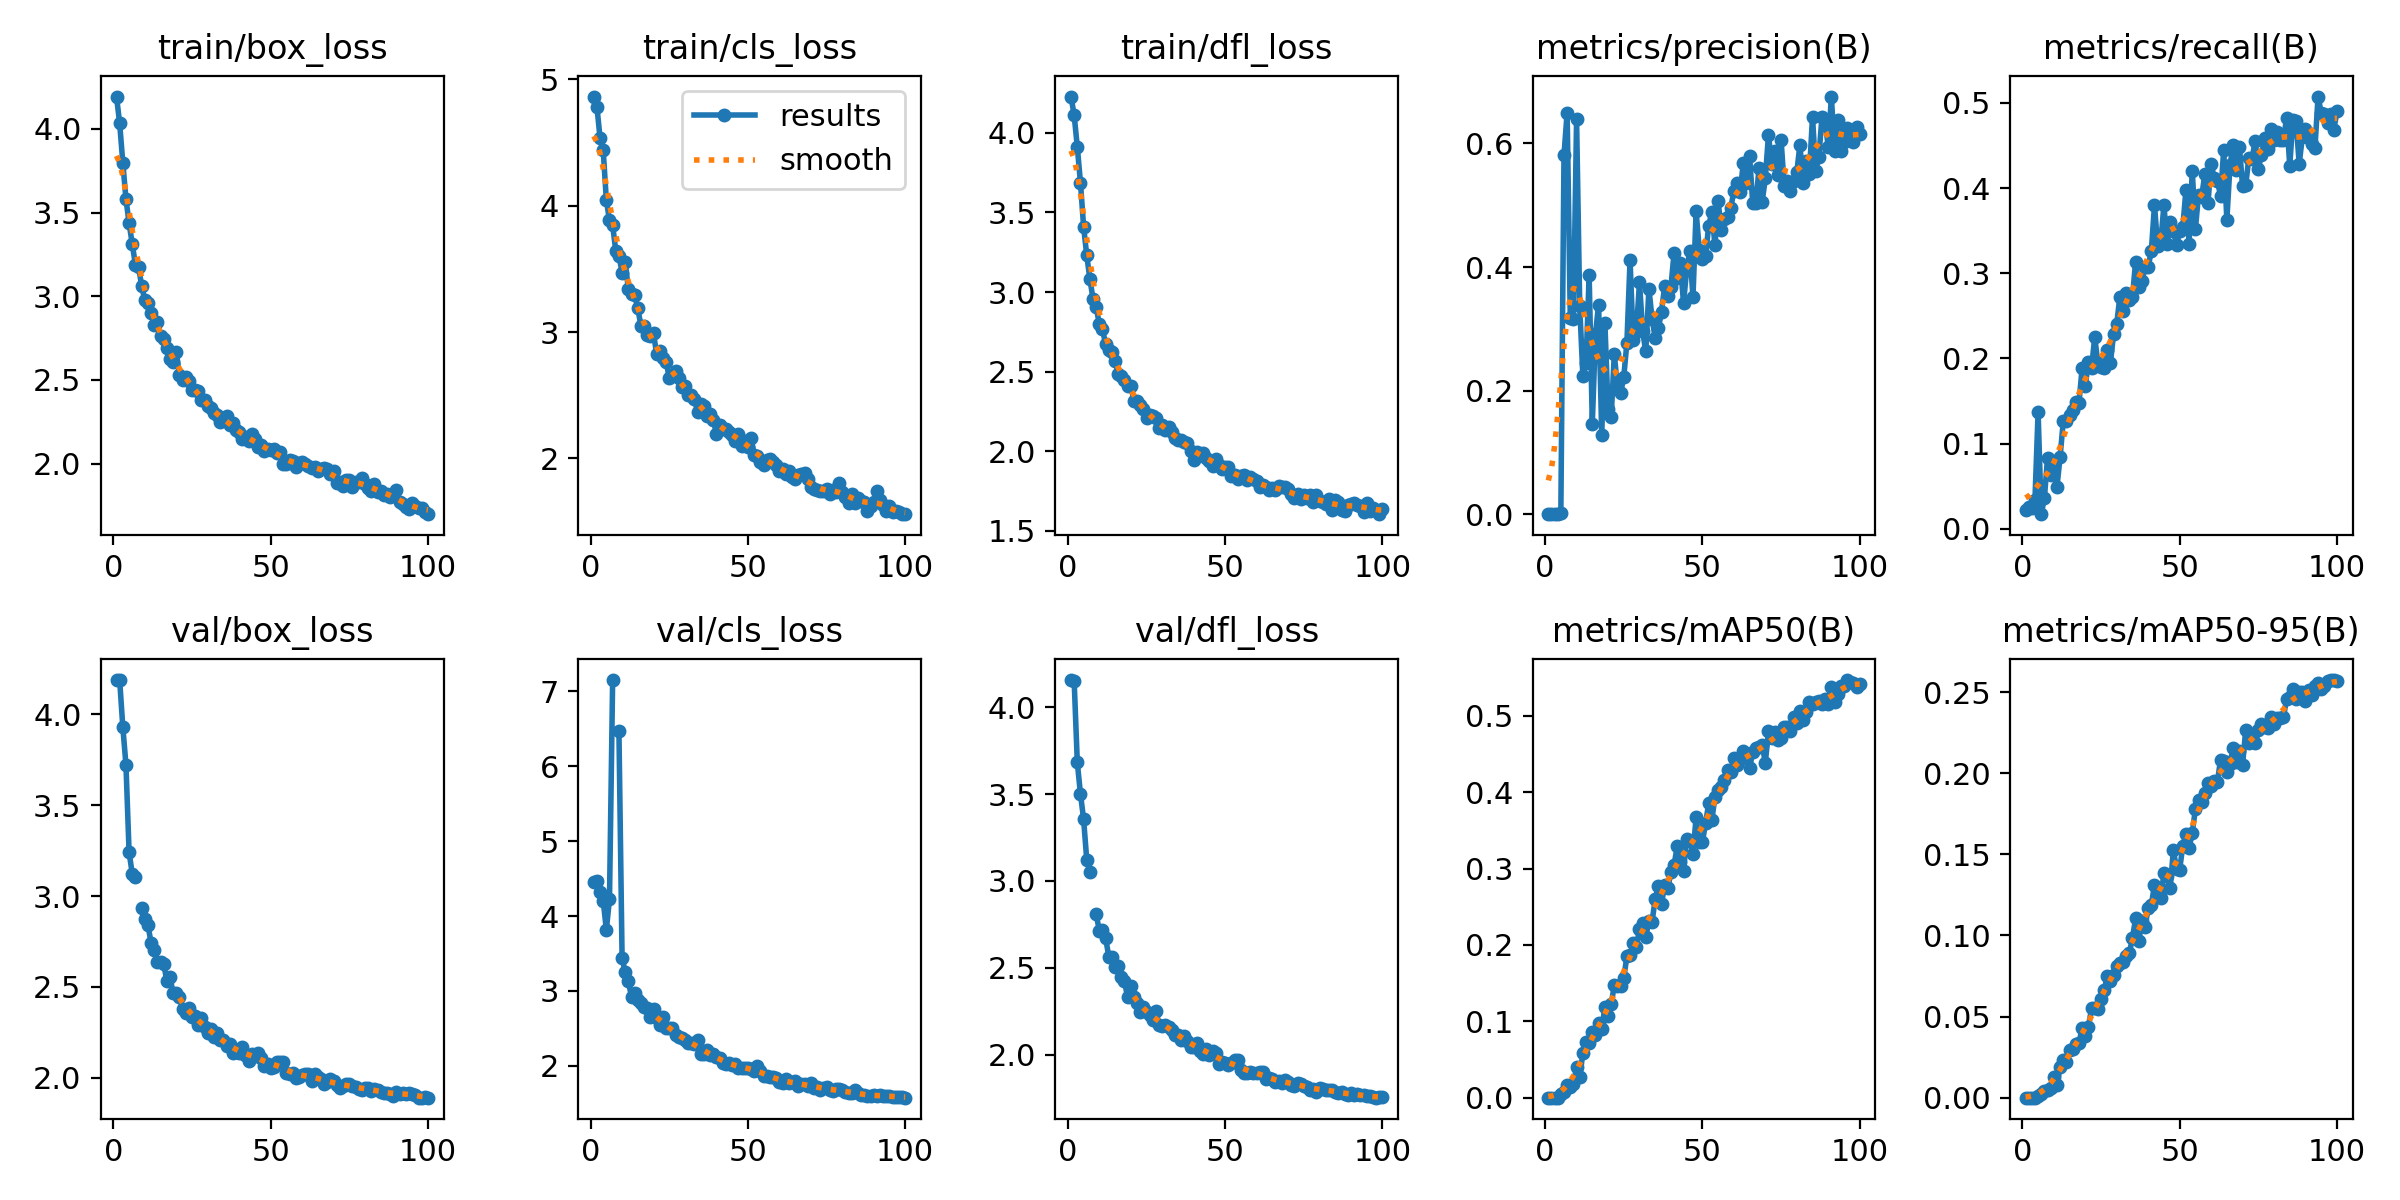

In [151]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

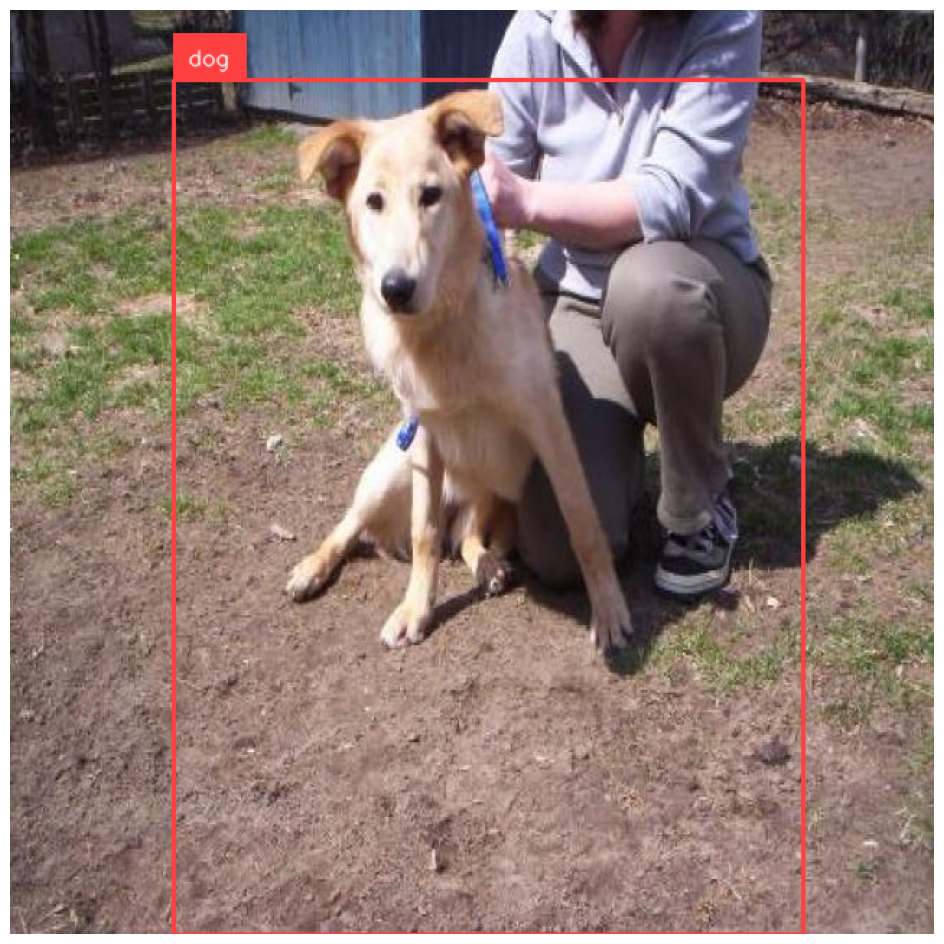

In [146]:
i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, conf=0.2, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## **Задание 4 (для магистрантов). Обучите модель YOLOv12 на датасете [RSD-GOD](https://github.com/Dr-Zhuang/geospatial-object-detection). Затем самостоятельно сформируйте тестовые данные (не менее 50 изображений с аннотациями) и оцените качество обученной модели:**



**Прямая ссылка на загрузку датасета: [загрузить](https://drive.google.com/open?id=1ttvSta0BRxW7tTV_st89vSb_obHVre34)**

 *Примечание: для поиска данных удобно использовать сервис Google Earth/Google Earth Engine*

In [ ]:
# Ваш код